# Visualization



### 1. Import libraries
Now, we need to import the necessary libraries and tools (🚨 in order to run the code like in the box below, place the mouse pointer in the cell, then click on “run cell” button above or press shift + enter).

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap
from IPython.display import Image
import datetime
from datetime import date
import calendar

### 2. Simulation settings

In [2]:
forecast_center = 'ECMWF'

# Assign working directory and time series data
path = os.getcwd()
folder = {1:'original',2:'biascorrected'}

### 3. Visualiszation

#### 3.1 Simulated accumulated flow chart

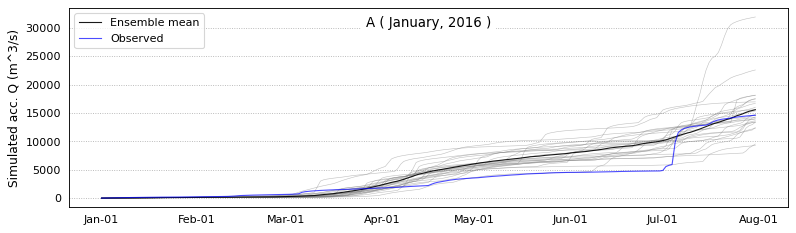

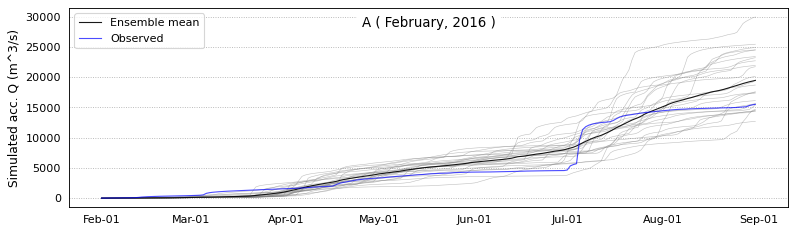

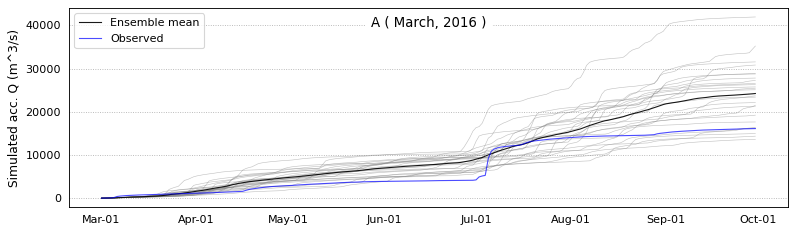

In [3]:
catchment_name = 'A'
start_year  = 2016
end_year    = 2016
start_month = 1
end_month   = 3
bc_type = 1      # 1 (origianl : before bias correction) or 2 (bias corrected)

for year in range(start_year, end_year+1):
    
    for month in range(start_month,end_month+1):
        
        # Import Data
        df = pd.read_csv(path + '/analysis/4.SFFs/3_run/' + folder[bc_type] + '/[out]' + catchment_name + '_' + str(year)+'_'
                         +str(month).zfill(2) + '.csv')
        df.drop(['leadtime'], axis=1, inplace=True)        
        df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, format='%m/%d/%Y', errors='ignore')

        # Define the upper limit, lower limit, interval of Y axis and colors
        y_LL = 0
        y_UL = int(np.cumsum(df.iloc[:, 1:]).max().max()*1.2)
        y_interval = y_UL/10

        # Draw Plot and Annotate
        fig, ax = plt.subplots(1,1,figsize=(11.6, 3.3), dpi= 80)    

        columns = df.columns[1:]
        
        ensemble_members = columns[:-2].size
                
        mycolors = ['tab:grey']*ensemble_members
                    
        for i, column in enumerate(columns[:-2]):  # plot the forecast ensemble members  
            plt.plot(df.date.values, np.cumsum(df[column].values), lw=0.5, color=mycolors[i], alpha=0.5)
        
        plt.plot(df.date.values, np.cumsum(df['mean'].values), lw=1.0, color='black', alpha=0.9, label='Ensemble mean')
        plt.plot(df.date.values, np.cumsum(df['obs'].values), lw=1.0, color='b', alpha=0.7, label='Observed')

        # Decorations    
        plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                        labelbottom=True, left=False, right=False, labelleft=True)        
        # Add grid lines
        plt.grid(True, axis='y', linestyle=':') 

        dateFmt = mdates.DateFormatter('%b-%d')
        ax.xaxis.set_major_formatter(dateFmt)

        plt.title(catchment_name + ' ( ' + calendar.month_name[month] + ', ' + str(year) + ' )', x=0.5, y=0.87, 
                  fontsize=12, backgroundcolor='white')
        plt.ylabel('Simulated acc. Q (m^3/s)', fontsize = 11)
        plt.legend(loc = 'upper left')
        plt.show()

#### 3.2 Simulated flow chart (daily)

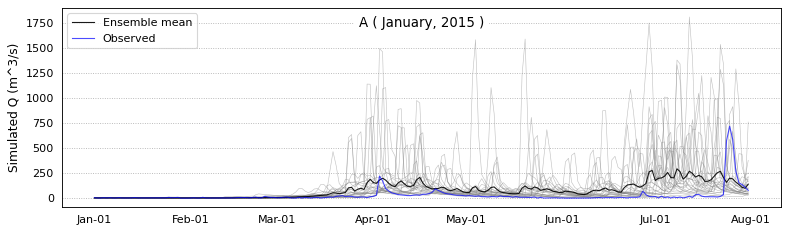

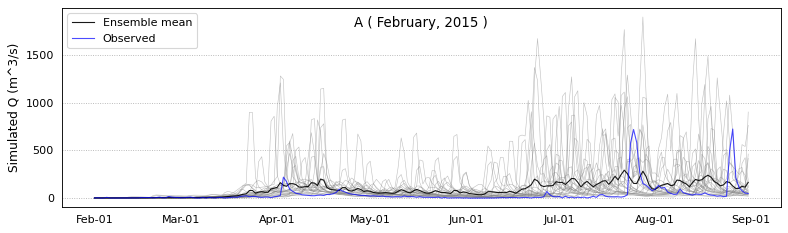

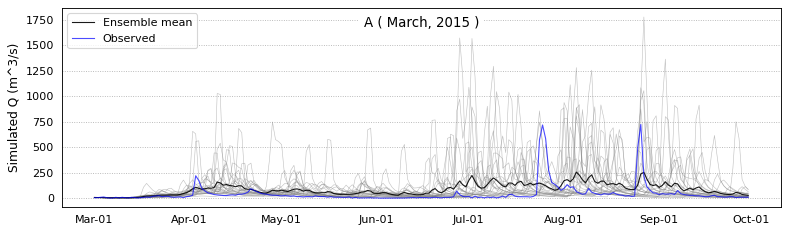

In [4]:
catchment_name = 'A'
start_year  = 2015
end_year    = 2015
start_month = 1
end_month   = 3
bc_type = 1      # 1 (origianl : before bias correction) or 2 (bias corrected)

for year in range(start_year, end_year+1):
    
    for month in range(start_month,end_month+1):
        
        # Import Data
        df = pd.read_csv(path + '/analysis/4.SFFs/3_run/' + folder[bc_type] + '/[out]' + catchment_name + '_' + str(year)+'_'
                         +str(month).zfill(2) + '.csv')
        df.drop(['leadtime'], axis=1, inplace=True)        
        df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, format='%m/%d/%Y', errors='ignore')

        # Define the upper limit, lower limit, interval of Y axis and colors
        y_LL = 0
        y_UL = round(df.iloc[:, 1:].max()*1.2, 0)
        y_interval = y_UL/10

        # Draw Plot and Annotate
        fig, ax = plt.subplots(1,1,figsize=(11.6, 3.3), dpi= 80)    

        columns = df.columns[1:]
        
        ensemble_members = columns[:-2].size
                
        mycolors = ['tab:grey']*ensemble_members
                    
        for i, column in enumerate(columns[:-2]):  # plot the forecast ensemble members  
            plt.plot(df.date.values, df[column].values, lw=0.5, color=mycolors[i], alpha=0.5)
        
        plt.plot(df.date.values, df['mean'].values, lw=1.0, color='black', alpha=0.9, label='Ensemble mean')
        plt.plot(df.date.values, df['obs'].values, lw=1.0, color='b', alpha=0.7, label='Observed')

        # Decorations    
        plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                        labelbottom=True, left=False, right=False, labelleft=True)        
        # Add grid lines
        plt.grid(True, axis='y', linestyle=':') 

        dateFmt = mdates.DateFormatter('%b-%d')
        ax.xaxis.set_major_formatter(dateFmt)

        plt.title(catchment_name + ' ( ' + calendar.month_name[month] + ', ' + str(year) + ' )', x=0.5, y=0.87, 
                  fontsize=12, backgroundcolor='white')
        plt.ylabel('Simulated Q (m^3/s)', fontsize = 11)
        plt.legend(loc = 'upper left')    
        plt.show()

#### 3.3 CRPS boxplot

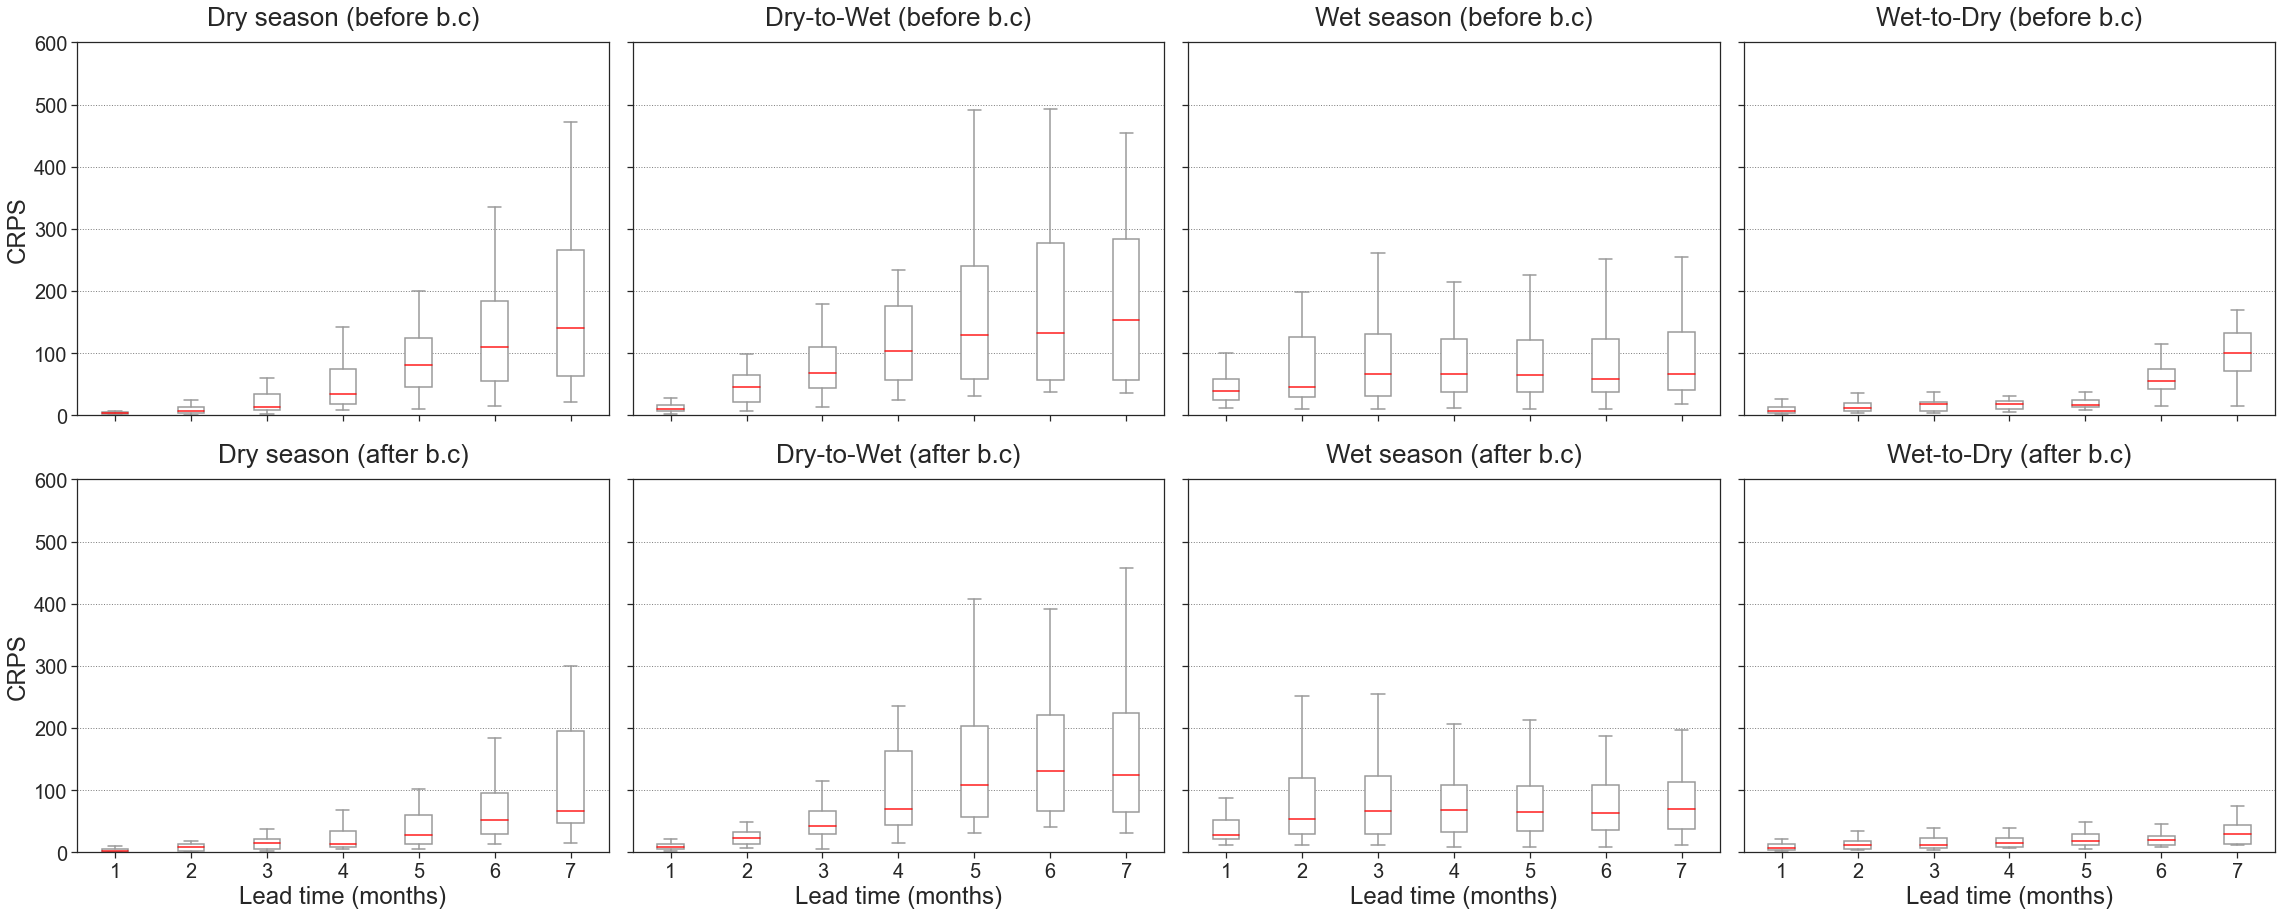

In [5]:
sns.set_theme(style='ticks')
df_before = pd.read_csv(path + '/analysis/4.SFFs/3_run/original/skill/[skill]' + catchment_name + '_original_sffs.csv')
df_after = pd.read_csv(path + '/analysis/4.SFFs/3_run/biascorrected/skill/[skill]' + catchment_name + '_biascorrected_sffs.csv')

# Seasonal data gathering
df_dry_1 = df_before[(df_before.month == 12)|(df_before.month == 1)|(df_before.month == 2)]
df_t1_1  = df_before[(df_before.month == 3)|(df_before.month == 4)|(df_before.month == 5)]
df_wet_1 = df_before[(df_before.month == 6)|(df_before.month == 7)|(df_before.month == 8)|(df_before.month == 9)]
df_t2_1  = df_before[(df_before.month == 10)|(df_before.month == 11)]

df_dry_2 = df_after[(df_after.month == 12)|(df_after.month == 1)|(df_after.month == 2)]
df_t1_2  = df_after[(df_after.month == 3)|(df_after.month == 4)|(df_after.month == 5)]
df_wet_2 = df_after[(df_after.month == 6)|(df_after.month == 7)|(df_after.month == 8)|(df_after.month == 9)]
df_t2_2  = df_after[(df_after.month == 10)|(df_after.month == 11)]
    
fig= plt.subplots(2, 4, sharex=False, figsize=(8*4, 6.5*2))

plt.subplot(2,4,1)
x= df_dry_1['leadtime']
y= df_dry_1['CRPS']

ax = sns.boxplot(x = x, y = y, data=df_dry_1, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(0,600)
plt.title('Dry season (before b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel(None)
plt.ylabel('CRPS', fontsize=24)
ax.axes.xaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,2)
x= df_t1_1['leadtime']
y= df_t1_1['CRPS']

ax = sns.boxplot(x = x, y = y, data=df_t1_1, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(0,600)
plt.title('Dry-to-Wet (before b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel(None)
plt.ylabel(None)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,3)
x= df_wet_1['leadtime']
y= df_wet_1['CRPS']

ax = sns.boxplot(x = x, y = y, data=df_wet_1, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(0,600)
plt.title('Wet season (before b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel(None)
plt.ylabel(None)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,4)
x= df_t2_1['leadtime']
y= df_t2_1['CRPS']

ax = sns.boxplot(x = x, y = y, data=df_t2_1, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(0,600)
plt.title('Wet-to-Dry (before b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel(None)
plt.ylabel(None)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')


plt.subplot(2,4,5)
x= df_dry_2['leadtime']
y= df_dry_2['CRPS']

ax = sns.boxplot(x = x, y = y, data=df_dry_2, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(0,600)
plt.title('Dry season (after b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Lead time (months)', fontsize=24)
plt.ylabel('CRPS', fontsize=24)
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,6)
x= df_t1_2['leadtime']
y= df_t1_2['CRPS']

ax = sns.boxplot(x = x, y = y, data=df_t1_2, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(0,600)
plt.title('Dry-to-Wet (after b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Lead time (months)', fontsize=24)
plt.ylabel(None)
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,7)
x= df_wet_2['leadtime']
y= df_wet_2['CRPS']

ax = sns.boxplot(x = x, y = y, data=df_wet_2, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(0,600)
plt.title('Wet season (after b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Lead time (months)', fontsize=24)
plt.ylabel(None)
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,8)
x= df_t2_2['leadtime']
y= df_t2_2['CRPS']

ax = sns.boxplot(x = x, y = y, data=df_t2_2, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(0,600)
plt.title('Wet-to-Dry (after b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Lead time (months)', fontsize=24)
plt.ylabel(None)
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.tight_layout(pad=1.5)

#### 3.4 CRPSS boxplot

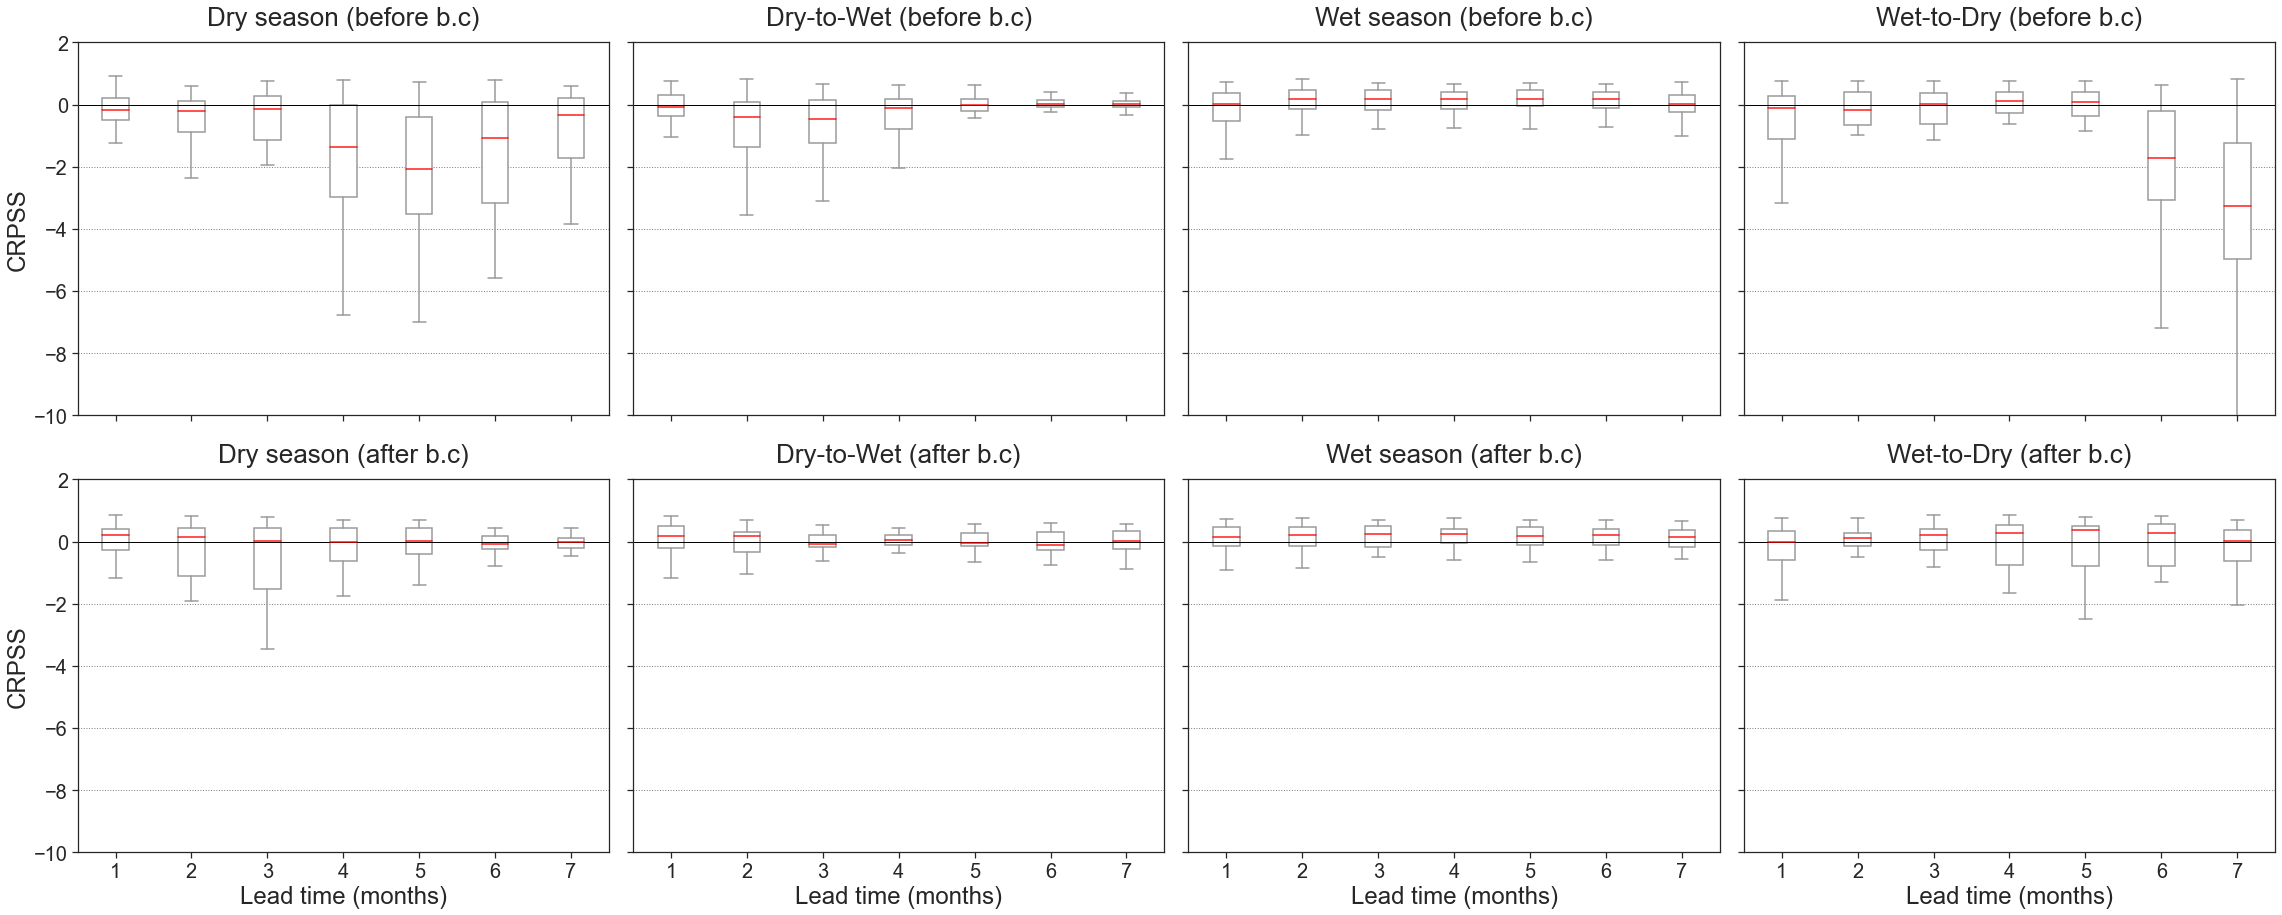

In [6]:
sns.set_theme(style='ticks')
df_before = pd.read_csv(path + '/analysis/4.SFFs/3_run/original/skill/[skill]' + catchment_name + '_original_sffs.csv')
df_after = pd.read_csv(path + '/analysis/4.SFFs/3_run/biascorrected/skill/[skill]' + catchment_name + '_biascorrected_sffs.csv')

# Seasonal data gathering
df_dry_1 = df_before[(df_before.month == 12)|(df_before.month == 1)|(df_before.month == 2)]
df_t1_1  = df_before[(df_before.month == 3)|(df_before.month == 4)|(df_before.month == 5)]
df_wet_1 = df_before[(df_before.month == 6)|(df_before.month == 7)|(df_before.month == 8)|(df_before.month == 9)]
df_t2_1  = df_before[(df_before.month == 10)|(df_before.month == 11)]

df_dry_2 = df_after[(df_after.month == 12)|(df_after.month == 1)|(df_after.month == 2)]
df_t1_2  = df_after[(df_after.month == 3)|(df_after.month == 4)|(df_after.month == 5)]
df_wet_2 = df_after[(df_after.month == 6)|(df_after.month == 7)|(df_after.month == 8)|(df_after.month == 9)]
df_t2_2  = df_after[(df_after.month == 10)|(df_after.month == 11)]
    
fig= plt.subplots(2, 4, sharex=False, figsize=(8*4, 6.5*2))

plt.subplot(2,4,1)
x= df_dry_1['leadtime']
y= df_dry_1['CRPSS']

ax = sns.boxplot(x = x, y = y, data=df_dry_1, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(-10,2)
plt.title('Dry season (before b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel(None)
plt.ylabel('CRPSS', fontsize=24)
ax.axes.xaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,2)
x= df_t1_1['leadtime']
y= df_t1_1['CRPSS']

ax = sns.boxplot(x = x, y = y, data=df_t1_1, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(-10,2)
plt.title('Dry-to-Wet (before b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel(None)
plt.ylabel(None)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,3)
x= df_wet_1['leadtime']
y= df_wet_1['CRPSS']

ax = sns.boxplot(x = x, y = y, data=df_wet_1, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(-10,2)
plt.title('Wet season (before b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel(None)
plt.ylabel(None)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,4)
x= df_t2_1['leadtime']
y= df_t2_1['CRPSS']

ax = sns.boxplot(x = x, y = y, data=df_t2_1, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(-10,2)
plt.title('Wet-to-Dry (before b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel(None)
plt.ylabel(None)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')


plt.subplot(2,4,5)
x= df_dry_2['leadtime']
y= df_dry_2['CRPSS']

ax = sns.boxplot(x = x, y = y, data=df_dry_2, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(-10,2)
plt.title('Dry season (after b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Lead time (months)', fontsize=24)
plt.ylabel('CRPSS', fontsize=24)
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,6)
x= df_t1_2['leadtime']
y= df_t1_2['CRPSS']

ax = sns.boxplot(x = x, y = y, data=df_t1_2, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(-10,2)
plt.title('Dry-to-Wet (after b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Lead time (months)', fontsize=24)
plt.ylabel(None)
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,7)
x= df_wet_2['leadtime']
y= df_wet_2['CRPSS']

ax = sns.boxplot(x = x, y = y, data=df_wet_2, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(-10,2)
plt.title('Wet season (after b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Lead time (months)', fontsize=24)
plt.ylabel(None)
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.subplot(2,4,8)
x= df_t2_2['leadtime']
y= df_t2_2['CRPSS']

ax = sns.boxplot(x = x, y = y, data=df_t2_2, dodge=True, width=0.35, linewidth=1.5, color = 'white',
                 boxprops=dict(alpha=1), medianprops=dict(color="red", alpha=0.9), showfliers = False)
plt.axhline(y=0, color='black', lw=1.0, linestyle='-')  #수평 중앙선 삽입하기
plt.ylim(-10,2)
plt.title('Wet-to-Dry (after b.c)',  x=0.5, y=1.03, fontsize=26)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Lead time (months)', fontsize=24)
plt.ylabel(None)
ax.axes.yaxis.set_ticklabels([])
plt.grid(True, axis='y', linestyle=':', color='grey')

plt.tight_layout(pad=1.5)

#### 3.5 Overall skill (%) Heatmap and seasonal line graph

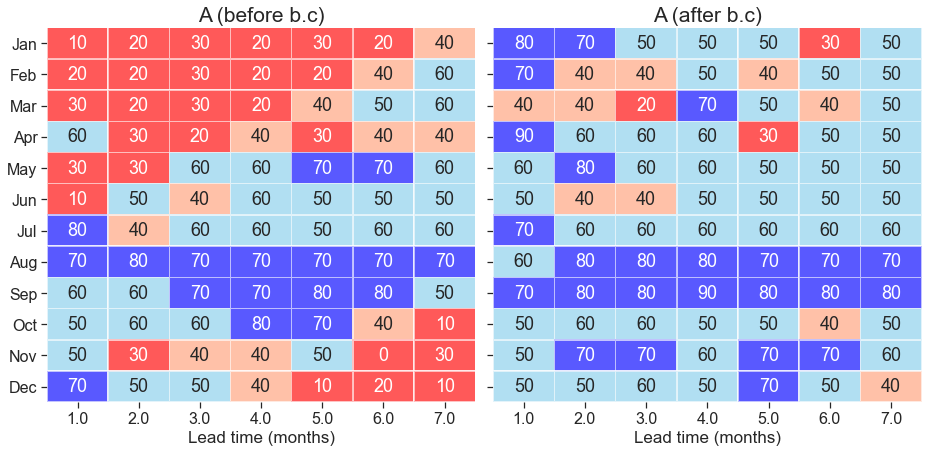

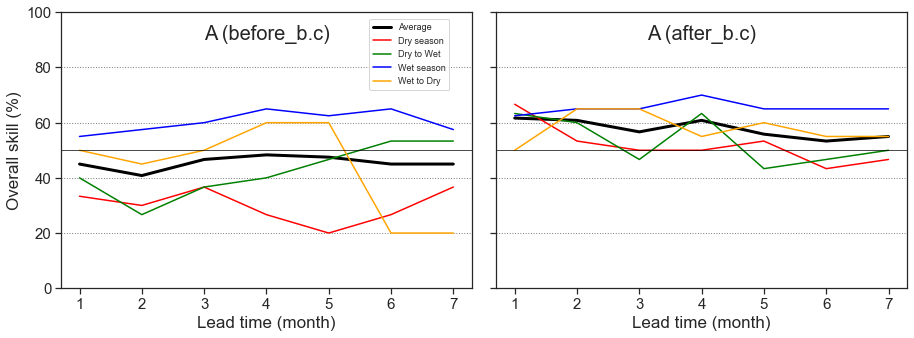

In [8]:
catchment_name = 'A'
bc_type = 1      # 1 (origianl : before bias correction) or 2 (bias corrected)

for bc_type in range(1,3):
    df = pd.read_csv(path + '/analysis/4.SFFs/3_run/' + folder[bc_type] + '/skill/[skill]' + catchment_name + '_' 
                     + folder[bc_type] + '_sffs.csv')
    count = df.reset_index().pivot_table("count", "month", "leadtime", aggfunc = "sum")
    f = count/(1*10)*100                                # probability calculation
    ff = f.reset_index().rename(columns={"Index":"a"})

    temp = pd.DataFrame()
    empty_df = pd.DataFrame()
    for lt in range(1,8):
        for i in range(0,len(ff)):
            month = ff['month'][i]
            leadtime = lt
            chances = ff[lt][i]
            empty_df = pd.DataFrame(columns = ['leadtime','month','chances'])
            empty_df.loc[i] = [leadtime, month, chances]
            temp = pd.concat([temp, empty_df], axis=0)
    df_f = temp
    df_f.reset_index(level=0, inplace=True)             # new dataset (probability) generation
    
    # Seasonal data gathering
    condition1 = (df_f.month == 12)|(df_f.month == 1)|(df_f.month == 2)
    condition2 = (df_f.month == 3)|(df_f.month == 4)|(df_f.month == 5)
    condition3 = (df_f.month == 6)|(df_f.month == 7)|(df_f.month == 8)|(df_f.month == 9)
    condition4 = (df_f.month == 10)|(df_f.month == 11)
    df_dry = df_f[condition1]
    df_t1 = df_f[condition2]
    df_wet = df_f[condition3]
    df_t2 = df_f[condition4]
    
    if bc_type == 1:
        df_f_1   = df_f
        df_dry_1 = df_dry
        df_t1_1  = df_t1
        df_wet_1 = df_wet
        df_t2_1  = df_t2
    else :
        df_f_2   = df_f
        df_dry_2 = df_dry
        df_t1_2  = df_t1
        df_wet_2 = df_wet
        df_t2_2  = df_t2

# Drawing figures
    
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(6.6*2, 6.6))
plt.subplot(1,2,1)
d1 = df_f_1.pivot_table("chances", "month", "leadtime", aggfunc = "sum")
d1['mon'] = pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], index=[1,2,3,4,5,6,7,8,9,10,11,12])
d1.set_index('mon', inplace=True)
ax1 = sns.heatmap(d1, annot=True, cmap=ListedColormap(['red', 'lightsalmon', 'skyblue', 'blue']),
                  cbar_kws={'ticks': [35,50,65,80], 'extend': 'both'}, annot_kws={'fontsize': 18},
                  vmin=20, vmax=80, fmt='.0f',linewidth=0.5, cbar=False, alpha=0.65)
plt.title(str(catchment_name) + ' (before b.c)', fontsize=21)
ax1.set_xlabel('Lead time (months)', fontsize=17)
ax1.set_ylabel(None)
plt.yticks(rotation=0, horizontalalignment='right', fontsize=16)
plt.xticks(fontsize=16)

plt.subplot(1,2,2)
d2 = df_f_2.pivot_table("chances", "month", "leadtime", aggfunc = "sum")
d2['mon'] = pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], index=[1,2,3,4,5,6,7,8,9,10,11,12])
d2.set_index('mon', inplace=True)
ax1 = sns.heatmap(d2, annot=True, cmap=ListedColormap(['red', 'lightsalmon', 'skyblue', 'blue']),
                  cbar_kws={'ticks': [35,50,65,80], 'extend': 'both'}, annot_kws={'fontsize': 18},
                  vmin=20, vmax=80, fmt='.0f',linewidth=0.5, cbar=False, alpha=0.65)
plt.title(str(catchment_name) + ' (after b.c)', fontsize=21)
ax1.set_xlabel('Lead time (months)', fontsize=17)
ax1.set_ylabel(None)
ax1.axes.yaxis.set_ticklabels([])
plt.yticks(rotation=0, horizontalalignment='right', fontsize=16)
plt.xticks(fontsize=16)
fig.tight_layout(pad=1.5)


fig, axes = plt.subplots(1, 2, sharex=False, figsize=(6.5*2, 5))
plt.subplot(1,2,1)
ax= sns.lineplot(x='leadtime', y='chances', color= 'black', data=df_f_1, ci=None, label = 'Average', linewidth = 3)
ax= sns.lineplot(x='leadtime', y='chances', color= 'red', data=df_dry_1, ci=None, label = 'Dry season')
ax= sns.lineplot(x='leadtime', y='chances', color= 'green', data=df_t1_1, ci=None, label = 'Dry to Wet')
ax= sns.lineplot(x='leadtime', y='chances', color= 'blue', data=df_wet_1, ci=None, label = 'Wet season')
ax= sns.lineplot(x='leadtime', y='chances', color= 'orange', data=df_t2_1, ci=None, label = 'Wet to Dry')
plt.legend(loc=(0.75,0.72), fontsize=9)
plt.xlabel('Lead time (month)', fontsize=17)
plt.ylabel('Overall skill (%)', fontsize=17)
plt.ylim(0,100)
plt.axhline(y=50, color='black', lw=1.0, alpha=0.7, linestyle='-')  #수평 중앙선 삽입하기
plt.title(str(catchment_name) + ' (before_b.c)', x=0.5, y=0.88, fontsize = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.grid(True, axis='y', linestyle=':', color='grey')
    
plt.subplot(1,2,2)
ax= sns.lineplot(x='leadtime', y='chances', color= 'black', data=df_f_2, ci=None, label = 'Average', legend=None, linewidth = 3)
ax= sns.lineplot(x='leadtime', y='chances', color= 'red', data=df_dry_2, ci=None, label = 'Dry season', legend=None)
ax= sns.lineplot(x='leadtime', y='chances', color= 'green', data=df_t1_2, ci=None, label = 'Dry to Wet', legend=None)
ax= sns.lineplot(x='leadtime', y='chances', color= 'blue', data=df_wet_2, ci=None, label = 'Wet season', legend=None)
ax= sns.lineplot(x='leadtime', y='chances', color= 'orange', data=df_t2_2, ci=None, label = 'Wet to Dry', legend=None)
plt.xlabel('Lead time (month)', fontsize=17)
ax.axes.yaxis.set_ticklabels([])
plt.ylabel(None)
plt.ylim(0,100)
plt.axhline(y=50, color='black', lw=1.0, alpha=0.7, linestyle='-')  #수평 중앙선 삽입하기
plt.title(str(catchment_name) + ' (after_b.c)', x=0.5, y=0.88, fontsize = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.grid(True, axis='y', linestyle=':', color='grey')

fig.tight_layout(pad=1.5)